In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

sub_size = 200
X_size = 50000 

X = np.linspace(0,100, X_size)
X_star = X
X = X.reshape(-1,1)
sorted_indices = np.linspace(0, X_size-1, sub_size, dtype=int) 

X_sub = X[sorted_indices]
def RBF_kernel(X, Y, sigma2):
    X = np.array(X)
    Y = np.array(Y)
    mat1 = np.sum(X**2, 1).reshape(-1, 1)
    mat2 = np.sum(Y**2, 1)
    mat = mat1 + mat2 - 2 * np.dot(X, Y.T)
    mat = np.exp(-0.5 / sigma2 * mat)
    return mat

kTup = 10
K = RBF_kernel(X_sub, X_sub, kTup)  

eigenvalue, featurevector = np.linalg.eig(K)     
A = eigenvalue             
B = featurevector

KK = RBF_kernel(X, X_sub, kTup)     
K_1 = KK @ B
A = np.sqrt(A)
A = np.reciprocal(A)
A = A * np.sqrt(sub_size)
A1 = A.flatten()
A_lam = np.diag(A1)

F = K_1 @ A_lam
X_F = F                                 

X_F_1 = X_F[0,:]
X_F_1 = X_F_1.reshape(1, sub_size)

X = X_star
X = X.reshape(-1,1)
X = X[1:, :]
KK = RBF_kernel(X, X_sub, kTup)    

X_diag = np.diag(X.flatten())  
X_sub_diag = np.diag(X_sub.flatten())  
KK_D = ( KK @ X_sub_diag - X_diag @ KK ) / (kTup) 

eigenvalue, featurevector = np.linalg.eig(K)      
A = eigenvalue             
B = featurevector
K_1 = KK @ B
A = np.sqrt(A)
A = np.reciprocal(A)
A = A * np.sqrt(sub_size)
A1 = A.flatten()
A_lam = np.diag(A1)

F = K_1 @ A_lam
X_F = F                              

eigenvalue, featurevector = np.linalg.eig(K)      
A = eigenvalue             
B = featurevector
K_1 = KK_D @ B
A = np.sqrt(A)
A = np.reciprocal(A)
A = A * np.sqrt(sub_size)
A1 = A.flatten()
A_lam = np.diag(A1)

F_D = K_1 @ A_lam
X_F_D = F_D                               

gamma = 10000000

r = X ** 3 + 2*X + X**2 * ((1+ 3 * X**2)/(1+X+X**3))
p = 1
E = np.eye(sub_size)
I = np.ones((X_size, 1))
f = -(X + (1+ 3 * X**2)/(1+X+X**3))

A = (gamma * (f * X_F - X_F_D)).T
B = (gamma * f).T
zero = np.zeros((sub_size, 1))

X11 = E +  A @ (f * X_F) - A @ X_F_D -  A @ f @ X_F_1
X12 = X_F_1.T
X13 = zero
X1 = np.hstack((X11, X12, X13))
X21 =  B @(f * X_F) - B @ X_F_D - B @ f @ X_F_1
X22 = (np.array([1])).reshape(1, 1)
X23 = (np.array([0])).reshape(1, 1)
X2 = np.hstack((X21, X22, X23))
X31 = X_F_1
X32 = (np.array([0])).reshape(1, 1)
X33 = (np.array([1])).reshape(1, 1)
X3 = np.hstack((X31, X32, X33))

X_solve = np.vstack((X1, X2, X3))

Y1 = -A @ r - p * A @ f  
Y2 = -B @ r -  p * B @ f
Y3 = (np.array([1])).reshape(1, 1)

Y_solve = np.vstack((Y1, Y2, Y3))
W_lam_b = np.linalg.solve(X_solve, Y_solve)

X = X_star
X = X.reshape(-1,1)

KK = RBF_kernel(X, X_sub, kTup)
X_diag = np.diag(X.flatten())  
X_sub_diag = np.diag(X_sub.flatten())   
KK_D = (X_diag @ KK - KK @ X_sub_diag ) / (kTup) * -1

eigenvalue, featurevector = np.linalg.eig(K)      
A = eigenvalue             
B = featurevector
K_1 = KK @ B
A = np.sqrt(A)
A = np.reciprocal(A)
A = A * np.sqrt(sub_size)
A1 = A.flatten()
A_lam = np.diag(A1)

F = K_1 @ A_lam
X_F = F                             

W = W_lam_b[:sub_size, :]
b = W_lam_b[-1]
y_p =  np.real(np.dot(X_F,W) + b.item())

print(y_p.shape)

(50000, 1)


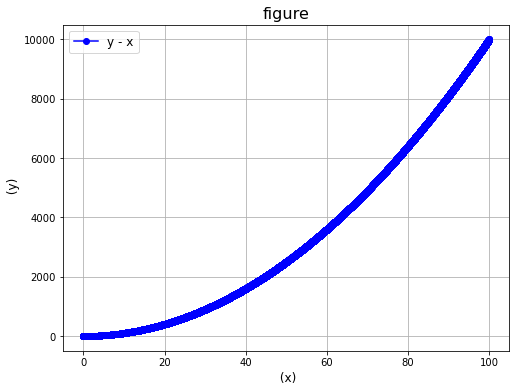

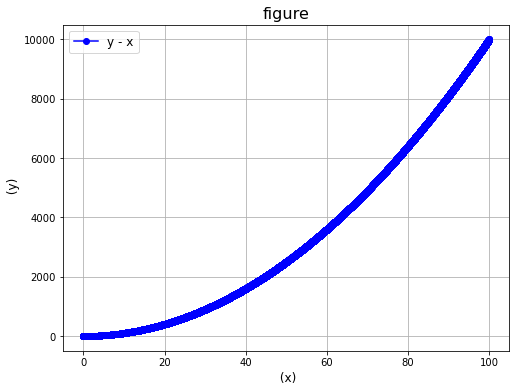

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = X 
a = y_p
y = y_p             
plt.figure(figsize=(8, 6))  
plt.plot(x, y, label="y - x", color="blue", linestyle="-", marker="o")
plt.title("figure", fontsize=16)
plt.xlabel(" (x)", fontsize=12)
plt.ylabel(" (y)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

x = X 
y_t = np.exp((-x**2)/2)/(1+x+x**3) + x**2
y_t = np.array(y_t)
b = y_t
y = y_t             
plt.figure(figsize=(8, 6))  
plt.plot(x, y, label="y - x", color="blue", linestyle="-", marker="o")
plt.title("figure", fontsize=16)
plt.xlabel(" (x)", fontsize=12)
plt.ylabel(" (y)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_p_fsvm = a
y_true = b
R2_fsvm = r2_score(y_p_fsvm, y_true)
mae_fsvm = mean_absolute_error(y_p_fsvm, y_true)
rmse_fsvm = mean_squared_error(y_p_fsvm, y_true, squared = False)
inf_norm_fsvm = np.linalg.norm(y_p_fsvm - y_true.reshape(-1, 1), ord = np.inf)

print(f"R2_fsvm: {R2_fsvm}, mae_fsvm: {mae_fsvm}, rmse_fsvm: {rmse_fsvm}, inf_norm_fsvm: {inf_norm_fsvm}") 

R2_fsvm: 0.9999999999999799, mae_fsvm: 0.00013760854004525895, rmse_fsvm: 0.0004230196972496014, inf_norm_fsvm: 0.004403952586658932


In [4]:
import numpy as np
import pandas as pd

data_to_save = pd.DataFrame({
    'x': x.flatten(),
    'y_pred_fsvm': y_p_fsvm.flatten(),
    'y_exact': y_true.flatten()

})

data_to_save.to_csv('fsvm_bigscale_01.csv', index=False)
print("fsvm_bigscale_01.csv")

数据已保存至 fsvm_bigscale_01.csv
